In [1]:
!pip install pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras import optimizers
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.callbacks as callbacks
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from keras import layers



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

mnist = tf.keras.datasets.mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
# Get the size of the MNIST datasets
train_size = len(x_train)
test_size = len(x_test)

print("Training dataset size:", train_size)
print("Testing dataset size:", test_size)


Training dataset size: 60000
Testing dataset size: 60000


In [4]:
train_image_shape = x_train.data.shape[1:]
test_image_shape = x_test.data.shape[1:]

print("Shape of images in training dataset:", train_image_shape)
print("Shape of images in testing dataset:", test_image_shape)

Shape of images in training dataset: (28, 28)
Shape of images in testing dataset: (28, 28)


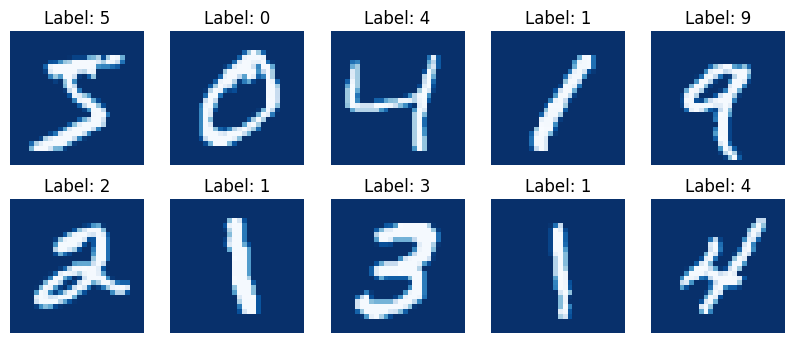

In [5]:
def show_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='Blues_r')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Sử dụng hàm show_images để hiển thị 10 hình ảnh từ tập dữ liệu huấn luyện
show_images(x_train, y_train)

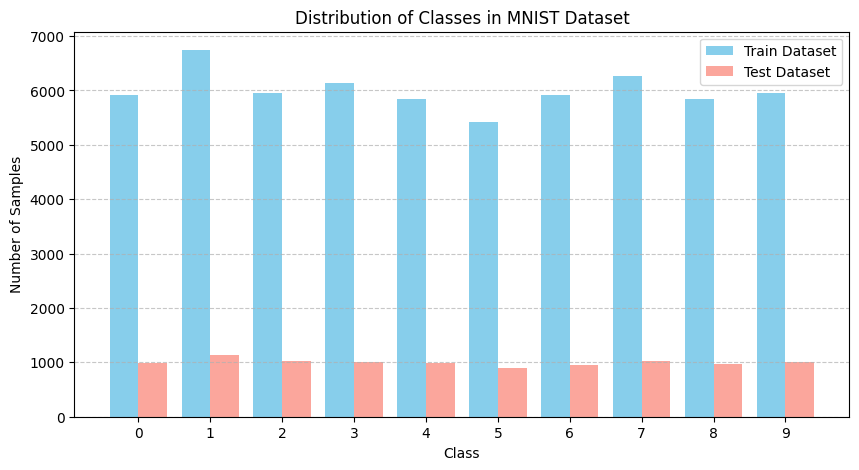

In [6]:
def plot_class_distribution(train_dataset, test_dataset, title):
    class_counts_train = [0] * 10
    for _, label in train_dataset:
        class_counts_train[label] += 1

    class_counts_test = [0] * 10
    for _, label in test_dataset:
        class_counts_test[label] += 1

    plt.figure(figsize=(10, 5))
    plt.bar(np.arange(10) - 0.2, class_counts_train, width=0.4, color='skyblue', label='Train Dataset')
    plt.bar(np.arange(10) + 0.2, class_counts_test, width=0.4, color='salmon', label='Test Dataset', alpha=0.7)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.title(title)
    plt.xticks(range(10))
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_class_distribution(zip(x_train, y_train), zip(x_test, y_test), 'Distribution of Classes in MNIST Dataset')


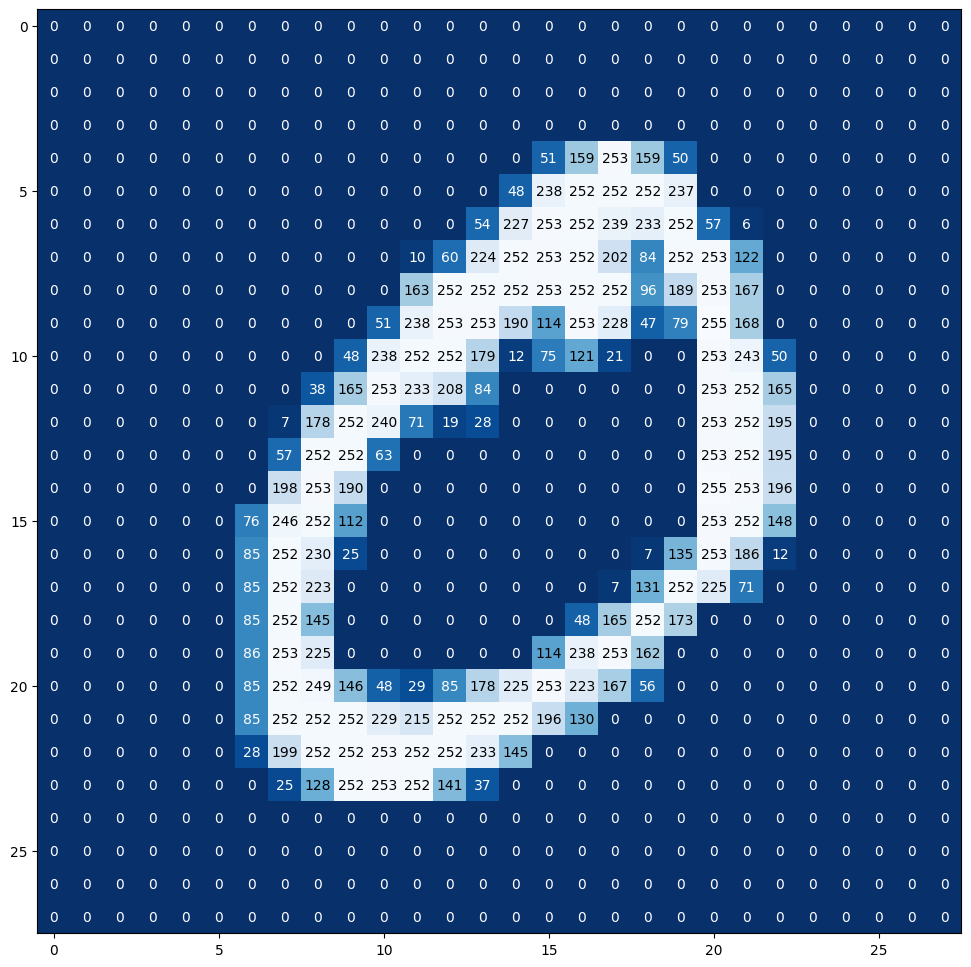

In [7]:

# Function to visualize an image from the dataset
def visualize_image(dataset, index):
    image_data, label = dataset[index]
    img = image_data.reshape((28, 28))

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='Blues_r')

    thresh = img.max() / 2.5
    width, height = img.shape
    for x in range(width):
        for y in range(height):
            val = round(img[x][y], 2) if img[x][y] != 0 else 0
            ax.annotate(str(val), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y] < thresh else 'black')

    plt.show()


visualize_image(list(zip(x_train, y_train)), 1)

In [8]:
num_labels = len(np.unique(y_train))
print("labels: ", num_labels)

labels:  10


In [9]:

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:

batch_size = 128
hidden_units = 256
dropout = 0.45

In [36]:

model = Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(526,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dropout(dropout),
    layers.Dense(32,activation='relu'),
    layers.Dropout(dropout),
    layers.Dense(10,activation='softmax'),
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 526)                 │         412,910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         134,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 591,384 (2.26 MB)

 Trainable params: 591,384 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

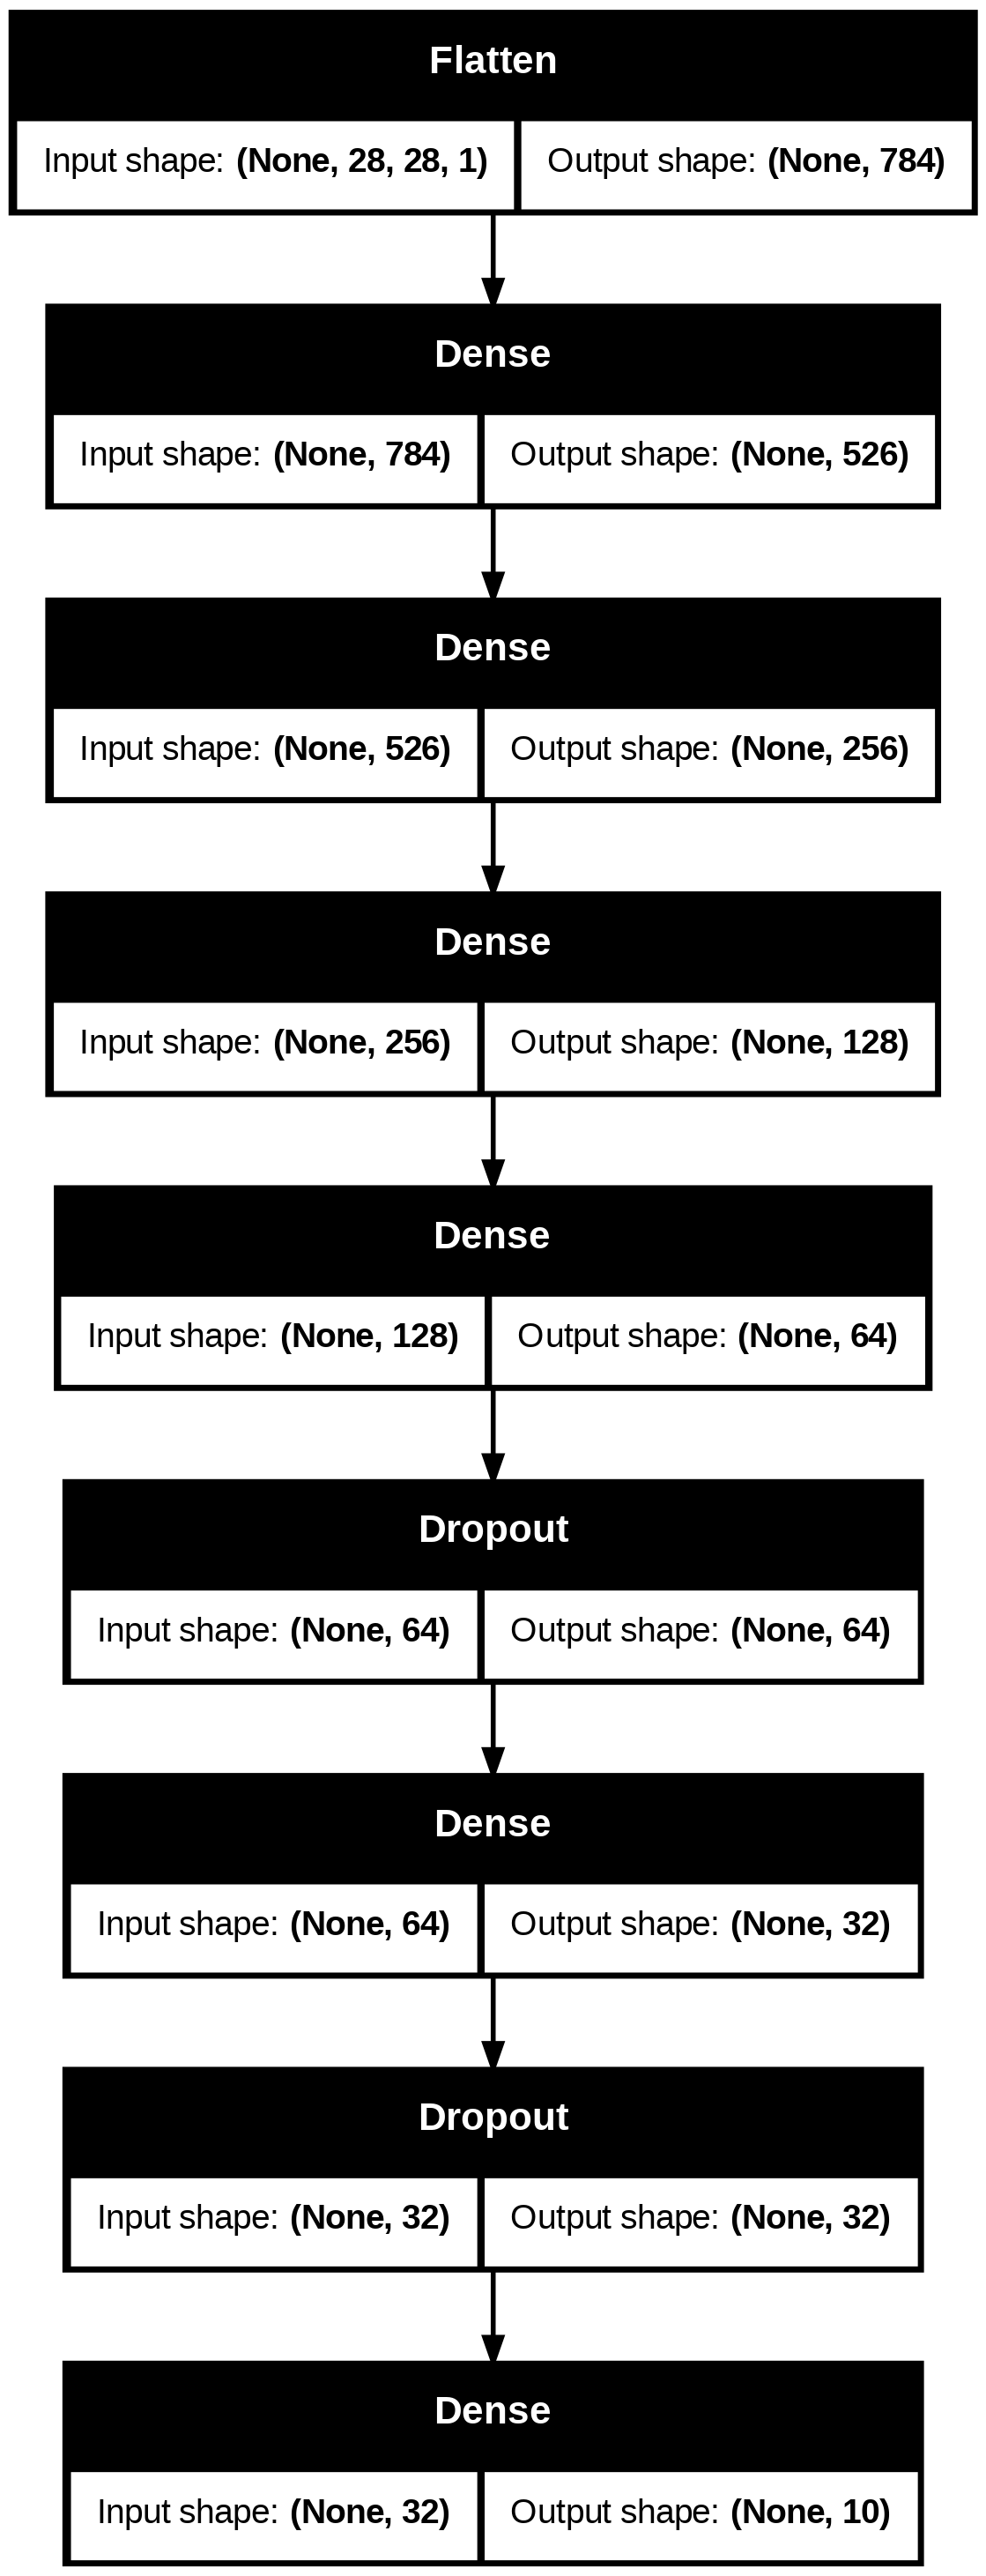

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [17]:


opt = optimizers.Adam(learning_rate = 0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
model.optimizer.get_config()

{'name': 'adam',
 'learning_rate': 9.999999747378752e-05,
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'loss_scale_factor': None,
 'gradient_accumulation_steps': None,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [19]:


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [20]:


checkpoint = callbacks.ModelCheckpoint(
    "model.keras",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto'
)
early = callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=15,
    verbose=1,
    mode='auto'
)

LRP = callbacks.ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.1,
    patience = 5,
    verbose = 1
)



In [22]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_size,
    epochs = 70,
    callbacks=[checkpoint, early, LRP]
)

Epoch 1/70
463/468 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3163 - loss: 1.8812

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_accuracy improved from -inf to 0.91710, saving model to model.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3180 - loss: 1.8771 - val_accuracy: 0.9171 - val_loss: 0.4248 - learning_rate: 1.0000e-04
Epoch 2/70
466/468 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7432 - loss: 0.8132
Epoch 2: val_accuracy improved from 0.91710 to 0.93920, saving model to model.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.7433 - loss: 0.8128 - val_accuracy: 0.9392 - val_loss: 0.2255 - learning_rate: 1.0000e-04
Epoch 3/70
465/468 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8384 - loss: 0.5419
Epoch 3: val_accuracy improved from 0.93920 to 0.95220, saving model to model.keras
468/468 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8385 - loss: 0.5417 - val_accuracy: 0.9522 - val_loss: 0.1733 - learning_rate: 1.0000e-04
Epoch 4/70
466/468 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8767 - loss: 0.4307
Epoch 4: val_accuracy improved from 0.95220 to 0

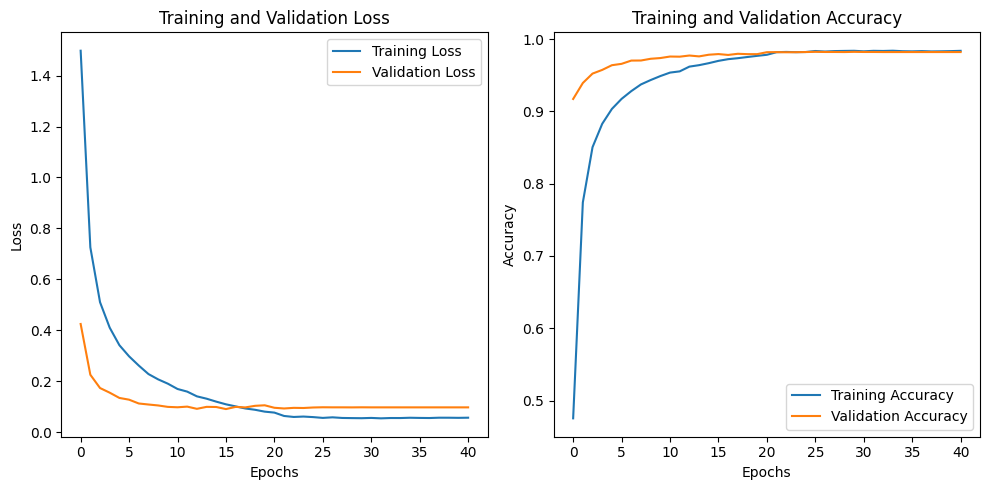

In [23]:

# Plot training loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


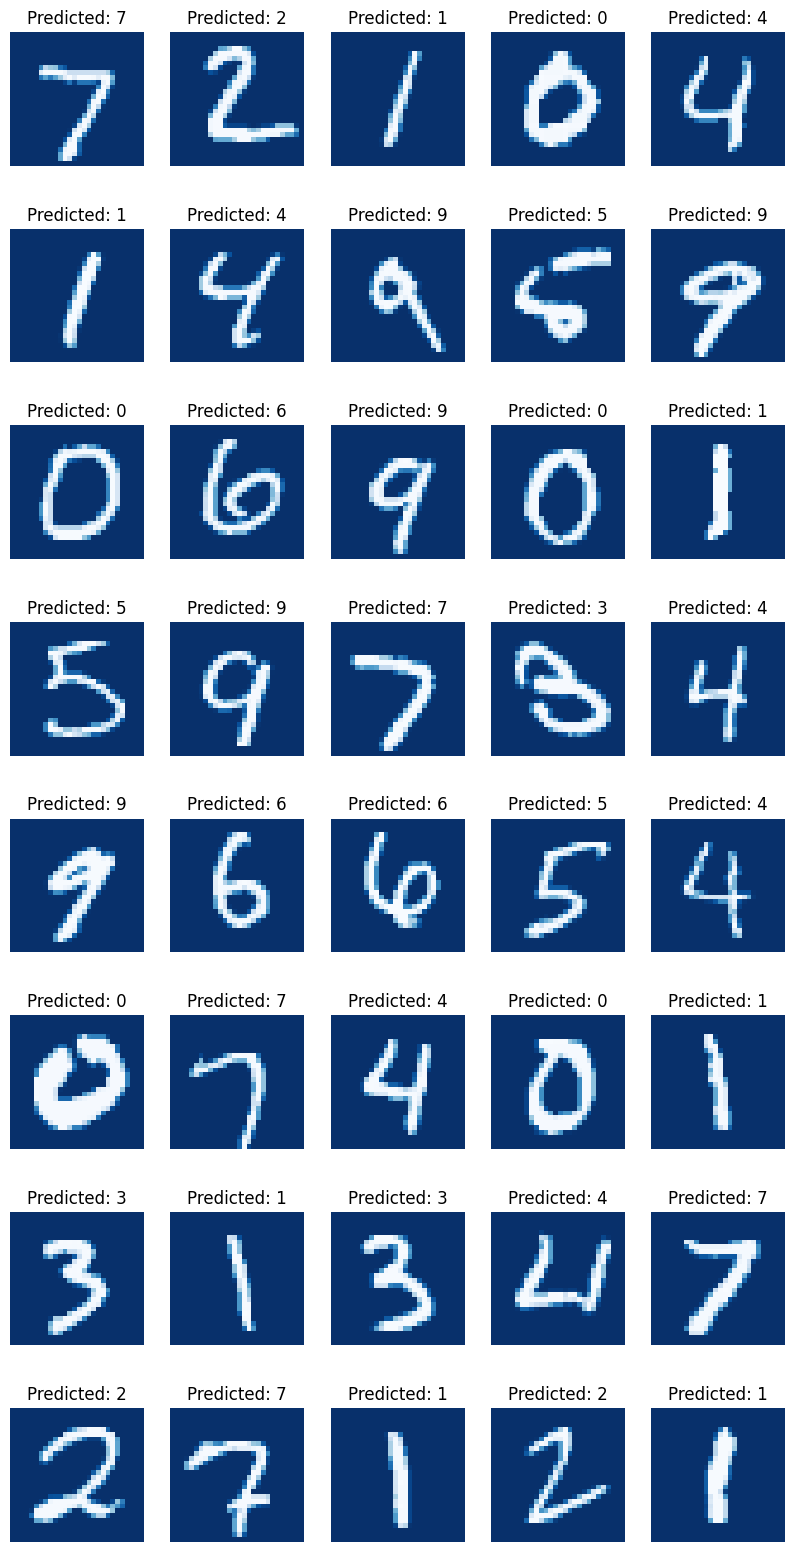

In [24]:
# Make predictions and display some images from the test dataset
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

plt.figure(figsize=(10, 20))
for i in range(40):
    plt.subplot(8, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='Blues_r')
    plt.title('Predicted: {}'.format(predicted_labels[i].numpy()))
    plt.axis('off')
plt.show()

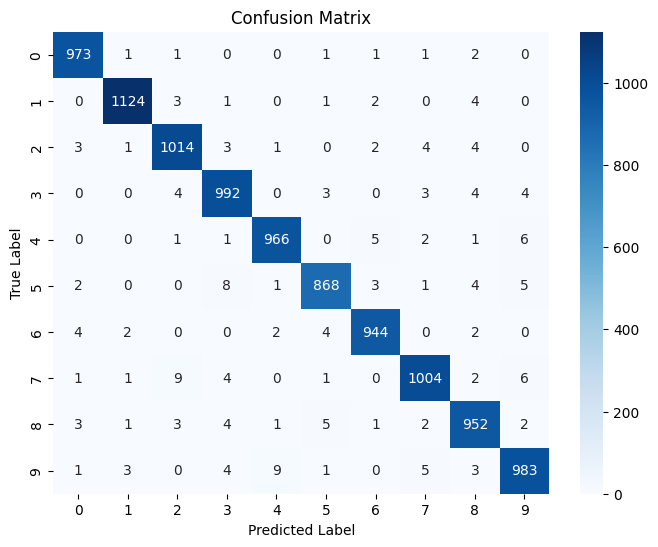

In [25]:

predicted_labels_onehot = tf.one_hot(predicted_labels, depth=10)
y_test_multiclass = tf.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_multiclass.numpy(), predicted_labels.numpy())
# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_test, predicted_labels_onehot.numpy())

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [33]:


print("\nClassification Report MLP:")
report = classification_report(y_test, predicted_labels_onehot)
print(report)
accuracy = accuracy_score(y_test, predicted_labels_onehot)
print("Accuracy MLP model: ",accuracy)


Classification Report MLP:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000

Accuracy MLP model:  0.982


In [34]:
conf_matrix

array([[ 973,    1,    1,    0,    0,    1,    1,    1,    2,    0],
       [   0, 1124,    3,    1,    0,    1,    2,    0,    4,    0],
       [   3,    1, 1014,    3,    1,    0,    2,    4,    4,    0],
       [   0,    0,    4,  992,    0,    3,    0,    3,    4,    4],
       [   0,    0,    1,    1,  966,    0,    5,    2,    1,    6],
       [   2,    0,    0,    8,    1,  868,    3,    1,    4,    5],
       [   4,    2,    0,    0,    2,    4,  944,    0,    2,    0],
       [   1,    1,    9,    4,    0,    1,    0, 1004,    2,    6],
       [   3,    1,    3,    4,    1,    5,    1,    2,  952,    2],
       [   1,    3,    0,    4,    9,    1,    0,    5,    3,  983]])